ColorizeImageCaffe instantiated
gpu_id = -1, net_path = ./models/reference_model/deploy_nodist.prototxt, model_path = ./models/reference_model/model.caffemodel


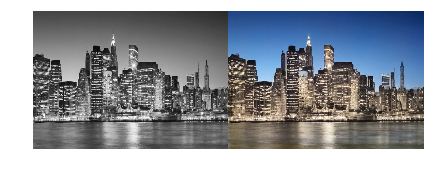

In [41]:
from data import colorize_image as CI
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color

%matplotlib inline

# Choose gpu to run the model on
gpu_id = -1

# Initialize colorization class
colorModel = CI.ColorizeImageCaffe(Xd=256)

# Load the model
colorModel.prep_net(gpu_id,'./models/reference_model/deploy_nodist.prototxt','./models/reference_model/model.caffemodel')

# Load the image
colorModel.load_image('../colorization/Code/Input/nyc_bw.png') # load an image

mask = np.zeros((1,256,256)) # giving no user points, so mask is all 0's
input_ab = np.zeros((2,256,256)) # ab values of user points, default to 0 for no input
img_out = colorModel.net_forward(input_ab,mask) # run model, returns 256x256 image

img_gray_fullres = colorModel.get_img_gray_fullres() # get grayscale image at fullresolution
img_out_fullres = colorModel.get_img_fullres() # get image at full resolution

# show result
plt.figure(figsize=(7,3))
plt.imshow(np.concatenate((img_gray_fullres,img_out_fullres),axis=1)); plt.axis('off');

In [12]:
def put_point(input_ab,mask,loc,p,val):
    # input_ab    2x256x256    current user ab input (will be updated)
    # mask        1x256x256    binary mask of current user input (will be updated)
    # loc         2 tuple      (h,w) of where to put the user input
    # p           scalar       half-patch size
    # val         2 tuple      (a,b) value of user input
    input_ab[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = np.array(val)[:,np.newaxis,np.newaxis]
    mask[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = 1
    return (input_ab,mask)

In [35]:
rgb = io.imread('../colorization/Code/Result/nyc_bw_pixmap_sat.png')
lab = color.rgb2lab(rgb)

pix_idxs    = []
pix_ab_vals = []

for row in xrange(len(lab)):
    for col in xrange(len(lab[0])):
        if list(lab[row][col]) != [0, 0, 0]:
            pix_idxs.append((row, col))
            pix_ab_vals.append(lab[row][col])
            
print pix_idxs
print pix_ab_vals

[(153, 181), (160, 33), (175, 213), (175, 273), (190, 399), (216, 135), (223, 3), (225, 393), (243, 339), (244, 368)]
[array([ 31.5290303 ,   3.41808705,   7.27374357]), array([ 22.44468143,   2.14968935,  11.96123915]), array([ 53.37427938,   1.100748  ,  14.34822149]), array([ 21.0687466 ,  10.93459026,  15.66071437]), array([ 22.48418797,   8.41740329,   6.11614419]), array([ 87.80153203,   4.48448863,   4.93222511]), array([ 44.17846114,   2.19349868,   3.95333853]), array([ 16.53149892,   2.32599013, -25.95120885]), array([ 43.60863747,  -1.42948435, -36.8703467 ]), array([ 44.46314586,  -0.7217931 , -39.05155615])]


1 ...
2 ...
3 ...
4 ...
5 ...
6 ...
7 ...
8 ...
9 ...
10 ...


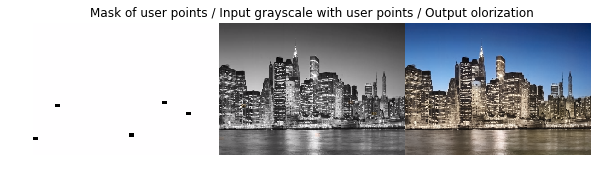

In [37]:
input_ab = np.zeros((2,256,256))
mask = np.zeros((1,256,256))

for i in xrange(len(pix_idxs)):
    print i + 1, "..."
    # add a blue point in the middle of the image
    (input_ab,mask) = put_point(input_ab,mask,[pix_idxs[i][0],pix_idxs[i][1]],3,[pix_ab_vals[i][1],pix_ab_vals[i][2]])

    # call forward
    img_out = colorModel.net_forward(input_ab,mask)

    # get mask, input image, and result in full resolution
    mask_fullres = colorModel.get_img_mask_fullres() # get input mask in full res
    img_in_fullres = colorModel.get_input_img_fullres() # get input image in full res
    img_out_fullres = colorModel.get_img_fullres() # get image at full resolution

# show user input, along with output
plt.figure(figsize=(10,6))
plt.imshow(np.concatenate((mask_fullres,img_in_fullres,img_out_fullres),axis=1));
plt.title('Mask of user points / Input grayscale with user points / Output olorization')
plt.axis('off');